In [3]:
!pip install kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c sejong-ai-challenge-p1

 76% 18.0M/23.8M [00:00<00:00, 44.1MB/s]
100% 23.8M/23.8M [00:00<00:00, 92.0MB/s]


In [5]:
!unzip sejong-ai-challenge-p1

Archive:  sejong-ai-challenge-p1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import cv2
import os
from random import *
import time
import copy

In [7]:

import torch
import numpy as np
import pandas as pd
from pandas import DataFrame

train = pd.read_csv('train.csv')
for i in range(0,33839):
  if (train['label'][i] == "missing" or train['label'][i] == "NAN"):
    train= train.drop([i])
test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

In [8]:
train

,id,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,2,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0,6
4,4,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0,3
5,5,0,0,0,5,4,5,5,3,5,6,2,0,0,0,0,0,0,0,2,3,7,4,4,5,5,0,0,0,0,0,0,4,5,4,5,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,4,9,7,8,7,5,4,8,12,5,7,8,7,4,3,7,5,0,0,0,4
6,6,0,0,0,0,0,0,0,0,0,0,0,0,159,161,143,180,142,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,231,241,217,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,36,50,51,68,48,48,33,14,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33834,59989,0,0,0,0,0,0,0,0,0,35,89,62,82,29,3,39,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164,238,249,...,228,210,233,117,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,132,133,171,198,217,209,210,198,168,144,122,131,25,0,0,0,0,0,0,0,4
33835,59990,0,0,0,0,0,0,0,0,0,1,0,19,221,214,203,202,200,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0,0,0,...,242,229,223,240,104,0,6,0,0,0,0,0,0,0,0,0,4,0,19,184,181,170,173,170,169,171,170,161,158,154,161,165,83,0,5,0,0,0,0,0
33836,59991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
33837,59992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [10]:
print(train.shape)
print(test.shape)

(28953, 786)
(8460, 785)


In [11]:
train['label'].drop_duplicates()
#라벨 2가 없음
#이 상태로 학습하면 예측값에 2가 안 나오나?

1      9
2      6
4      3
5      4
7      5
9      8
22     7
23     1
755    0
Name: label, dtype: object

In [12]:
train = train.drop(['id'], 1)

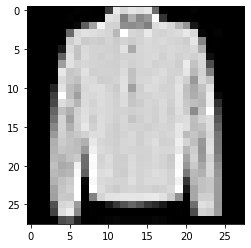

In [13]:
x_image_train = train.iloc[:, 0:784].to_numpy()

x_image_train = x_image_train.reshape(-1, 28,28).astype(int)

import matplotlib.pyplot as plt

img = x_image_train[6]
plt.imshow(img, cmap='gray')

In [14]:
from sklearn.model_selection import train_test_split
x_train = train.iloc[:, 0:-1].to_numpy()

y_train = train.iloc[:,-1]
y_train = np.array(y_train)
#y_train = torch.FloatTensor(y_train)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=1, stratify = y_train)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)

(20267, 784)
(8686, 784)
(20267,)


In [15]:
def make_folder(directory_path):
    if not os.path.isdir(directory_path):
        os.mkdir(directory_path)

path_train = os.path.join(os.getcwd(), 'train')
path_val = os.path.join(os.getcwd(), 'val')
path_test = os.path.join(os.getcwd(), 'test')

make_folder(path_train)
make_folder(path_val)
make_folder(path_test)


In [16]:
for i in (0,1,3,4,5,6,7,8,9):
    path_train_digit = os.path.join(path_train, str(i))
    path_val_digit = os.path.join(path_val, str(i))
    make_folder(path_train_digit)
    make_folder(path_val_digit)

In [17]:
for i in range(len(x_train)):
    label = y_train[i]
    img = x_train[i].reshape(28,28).astype(int)
    path_train_digit = os.path.join(path_train, str(label))

    if label == '0':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)

    elif label == '1':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)
    
    elif label == '3':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)

    elif label == '4':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)
    
    elif label == '5':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)

    elif label == '6':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)

    elif label == '7':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)
    
    elif label == '8':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)
    
    elif label == '9':
        path_train_image = os.path.join(path_train_digit, '%d.jpg'%(i))
        cv2.imwrite(path_train_image, img)

In [18]:
for i in range(len(x_val)):
    label = y_val[i]
    img = x_val[i].reshape(28,28).astype(int)
    path_val_digit = os.path.join(path_val, str(label))

    if label == '0':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)

    elif label == '1':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)
    
    elif label == '3':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)

    elif label == '4':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)
    
    elif label == '5':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)

    elif label == '6':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)

    elif label == '7':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)
    
    elif label == '8':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)
    
    elif label == '9':
        path_val_image = os.path.join(path_val_digit, '%d.jpg'%(i))
        cv2.imwrite(path_val_image, img)

In [19]:
test = test.drop(['id'], 1)


In [21]:
for i in range(len(test)):
    img = test.iloc[i, 0:].to_numpy().reshape(28,28).astype(int)
    path_test_digit = os.path.join(path_test, '%d.jpg'%(i))
    cv2.imwrite(path_test_digit, img)

In [22]:
img_size = 64
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize([img_size, img_size]),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(), #데이터 타입을 tensor로 변경
        transforms.Normalize([0.5],[0.5])
        #이미지의 경우 픽셀 값이 0~255의 값을 가지는데, ToTensor로 0~1사이의 값으로 바뀜
        #normalize시 -1~1사이의 값으로 normalize 됨

        # ToTensor ==> scaling
        # Normalize ==> centerizing+rescaling
    ]),
    'val':transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize([img_size, img_size]),
        transforms.ToTensor(),
        transforms.Normalize([0.5],[0.5])
    ])
}

In [23]:
data_dir = os.path.join(os.getcwd())

image_datasets = {x:datasets.ImageFolder(os.path.join(data_dir, x),
                                         data_transforms[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=20, shuffle=True, num_workers=20) for x in ['train', 'val']}
dataset_sizes = {x:len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print(dataset_sizes, class_names)


{'train': 20267, 'val': 8686} ['0', '1', '3', '4', '5', '6', '7', '8', '9']


In [24]:
#GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [26]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()

        self.layer1 = self.conv_module(1, 16)
        self.layer3 = self.conv_module(16, 32)
        self.layer4 = self.conv_module(32, 64)
        self.layer5 = self.conv_module(64, 128)
        self.layer6 = self.conv_module(128,256)
        self.gap = self.global_avg_pool(256, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.gap(out)
        out = out.view(-1, 10)

        return out

    def conv_module(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1))

    def global_avg_pool(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.AdaptiveAvgPool2d((1, 1)))

In [27]:
model = CustomCNN()
model = model.to(device)
print(model)

CustomCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer5): Sequential(
    (0): Conv2d(64

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, factor=0.1,patience=5)

In [29]:

def train_model(model, criterion, optimizer, scheduler, num_epochs=8):
    global_info=[]
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict()) #deepcopy 내부에 객체들까지 새롭게 copy 되는 것
    best_acc = 0.0
    early_stopping = EarlyStopping(patience=11, verbose=True)
    for epoch in range(num_epochs):
        local_info = []
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':

                model.train()  # Set model to training mode
            else:

                model.eval()   # Set model to evaluate mode

                
                if epoch >0:
                    scheduler.step(val_loss)
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            if phase == 'val':
                val_loss = running_loss / dataset_sizes['val']
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            #(Variable(x).data).cpu().numpy()
            if phase == 'train':
                local_info.append(epoch_loss)
                ea = epoch_acc.cpu().numpy()
                local_info.append(ea)
            else:
                local_info.append(epoch_loss)
                ea = epoch_acc.cpu().numpy()
                local_info.append(ea)



            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        lr_get = get_lr(optimizer)
        print("Current learning rate : {:.8f}".format(lr_get))
        global_info.append(local_info)
        if phase =='val':
            early_stopping(epoch_loss, model)

            if early_stopping.early_stop:
                print("Early stopping")
                break

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [30]:
model = train_model(model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=100)


Epoch 0/99
----------
train Loss: 1.0795 Acc: 0.7172
val Loss: 0.8609 Acc: 0.7065
Current learning rate : 0.00300000
Validation loss decreased (inf --> 0.860889).  Saving model ...
Epoch 1/99
----------
train Loss: 0.6513 Acc: 0.7925
val Loss: 0.5532 Acc: 0.8093
Current learning rate : 0.00300000
Validation loss decreased (0.860889 --> 0.553171).  Saving model ...
Epoch 2/99
----------
train Loss: 0.5599 Acc: 0.8139
val Loss: 0.5548 Acc: 0.7785
Current learning rate : 0.00300000
EarlyStopping counter: 1 out of 11
Epoch 3/99
----------
train Loss: 0.5096 Acc: 0.8289
val Loss: 0.4798 Acc: 0.8283
Current learning rate : 0.00300000
Validation loss decreased (0.553171 --> 0.479820).  Saving model ...
Epoch 4/99
----------
train Loss: 0.4737 Acc: 0.8377
val Loss: 0.4944 Acc: 0.8074
Current learning rate : 0.00300000
EarlyStopping counter: 1 out of 11
Epoch 5/99
----------
train Loss: 0.4523 Acc: 0.8430
val Loss: 0.4365 Acc: 0.8443
Current learning rate : 0.00300000
Validation loss decreased 

In [32]:
torch.save(model, './CustomCNN_model.pth')
import natsort as nt
from PIL import Image
from torch.autograd import Variable 
def test_model():
    data_transforms = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize([img_size,img_size]),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    model_ft = torch.load('./CustomCNN_model.pth', map_location=device)
    
    path_test = os.path.join(os.getcwd(), 'test')
    image_list = nt.natsorted(os.listdir(path_test))
    output_list = []
    for i, images in enumerate(image_list):
        path_test_image = os.path.join(path_test, images)
        image = Image.open(path_test_image)
        image = data_transforms(image)
        image.unsqueeze_(dim=0)
        image = Variable(image)
        image = image.cuda(device)
        torch.no_grad()
        output = model(image)
        #print(output)
        output = torch.argmax(output, dim=1)
        
        output_list.append(output)
        
    return output_list
output = test_model()

In [37]:


submit.label = torch.cat(output).detach().cpu().numpy()
print(submit)
submit.to_csv('./CustomCNN_result.csv', index=False)

         id  label
0        11      7
1        15      0
2        17      3
3        21      6
4        22      3
...     ...    ...
8455  59970      6
8456  59971      4
8457  59982      4
8458  59986      5
8459  59996      1

[8460 rows x 2 columns]


In [38]:
!kaggle competitions submit -c sejong-ai-challenge-p1 -f './CustomCNN_result.csv' -m "Message"

100% 64.5k/64.5k [00:01<00:00, 35.1kB/s]
Successfully submitted to Sejong AI Challenge 문제1

In [ ]:
# 뭐지 0.26 나오는데  . . ?